# <b>Stellar Classification</b>

### Name: Hung Pham
### Email address: mryo.hp@gmail.com

##  <u> Project description/introduction text (the background information) </u>

In astronomy, Stellar Classification has become an important factor for astronomers to identify and categorize different kinds of objects in space. The problem is that many scientists have collected an enormous amount of data in space through telescopes and other astronomical devices but most of them are not classified. 

We need to classify objects into different categories such as **stars, galaxies, and quasars** to understand more about space and its components. There are many attempts to solve the problem with this type of classification and each of them provides a different approach to the problem. 

In this project, I will use the “Stellar Classification Dataset - SDSS17” to build a model to classify those astronomical objects into their spectral characteristics. What I would do differently is that I will try to use many different machine learning techniques to classify the objects and compare those techniques to find a better solution to the problem.

##  <u> Machine learning algorithm selected for this project </u>

The machine learning algorithms I used in this project are:
- LinearSVC 
- SVC with RBF kernel
- Logistic Regression
- K-Nearest Neighbour Classifier(KNN)
- Random Forest Classifier

##  <u> Dataset source </u>

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

##  <u> References and sources </u>

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://www.scikit-yb.org/en/latest/api/classifier/class_prediction_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassPredictionError
from sklearn.linear_model import LogisticRegression
from yellowbrick.style import set_palette

In [ ]:
np.random.seed(42)

#### Load the dataset

In [ ]:
df = pd.read_csv('./star_classification.csv')

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


#### Only keep useful attributes and remove others.

In [ ]:
df = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift','class']]
df.head()

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY


#### Split X,Y

In [ ]:
X = df.drop(['class'], axis = 1)
Y = df.loc[:,'class'].values
X, Y

(            alpha      delta         u         g         r         i  \
 0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
 1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
 2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
 3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
 4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
 ...           ...        ...       ...       ...       ...       ...   
 99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
 99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
 99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
 99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
 99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   
 
               z  redshift  
 0      18.79371  0.634794  
 1      21.61427  0.779136  
 2      18.94827  0.644195  
 3    

#### Count the targets. Count how many Galaxy, how many QSO, and how many Stars are there.

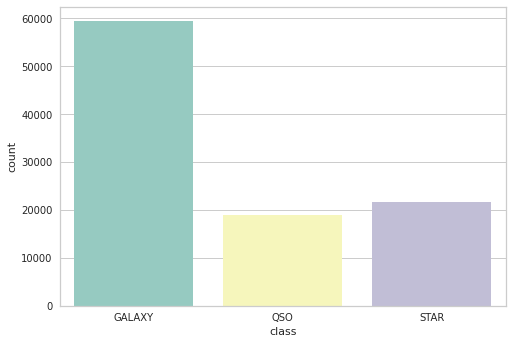

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [ ]:
ax = sns.countplot(x="class", data=df, palette="Set3")
sns.set(rc = {'figure.figsize':(15,9)})
plt.show()
df["class"].value_counts()

#### Heat Map Correlation

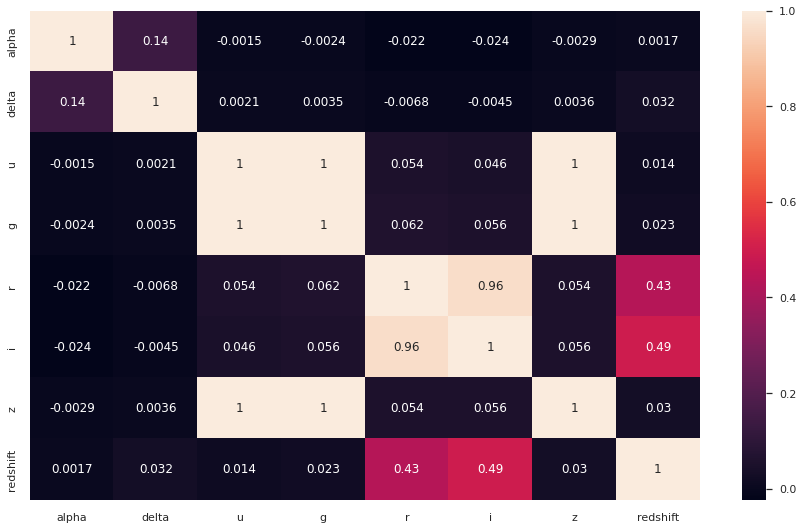

In [ ]:
sns.heatmap(data= df.corr(), annot= True)

#### Visualizing data 

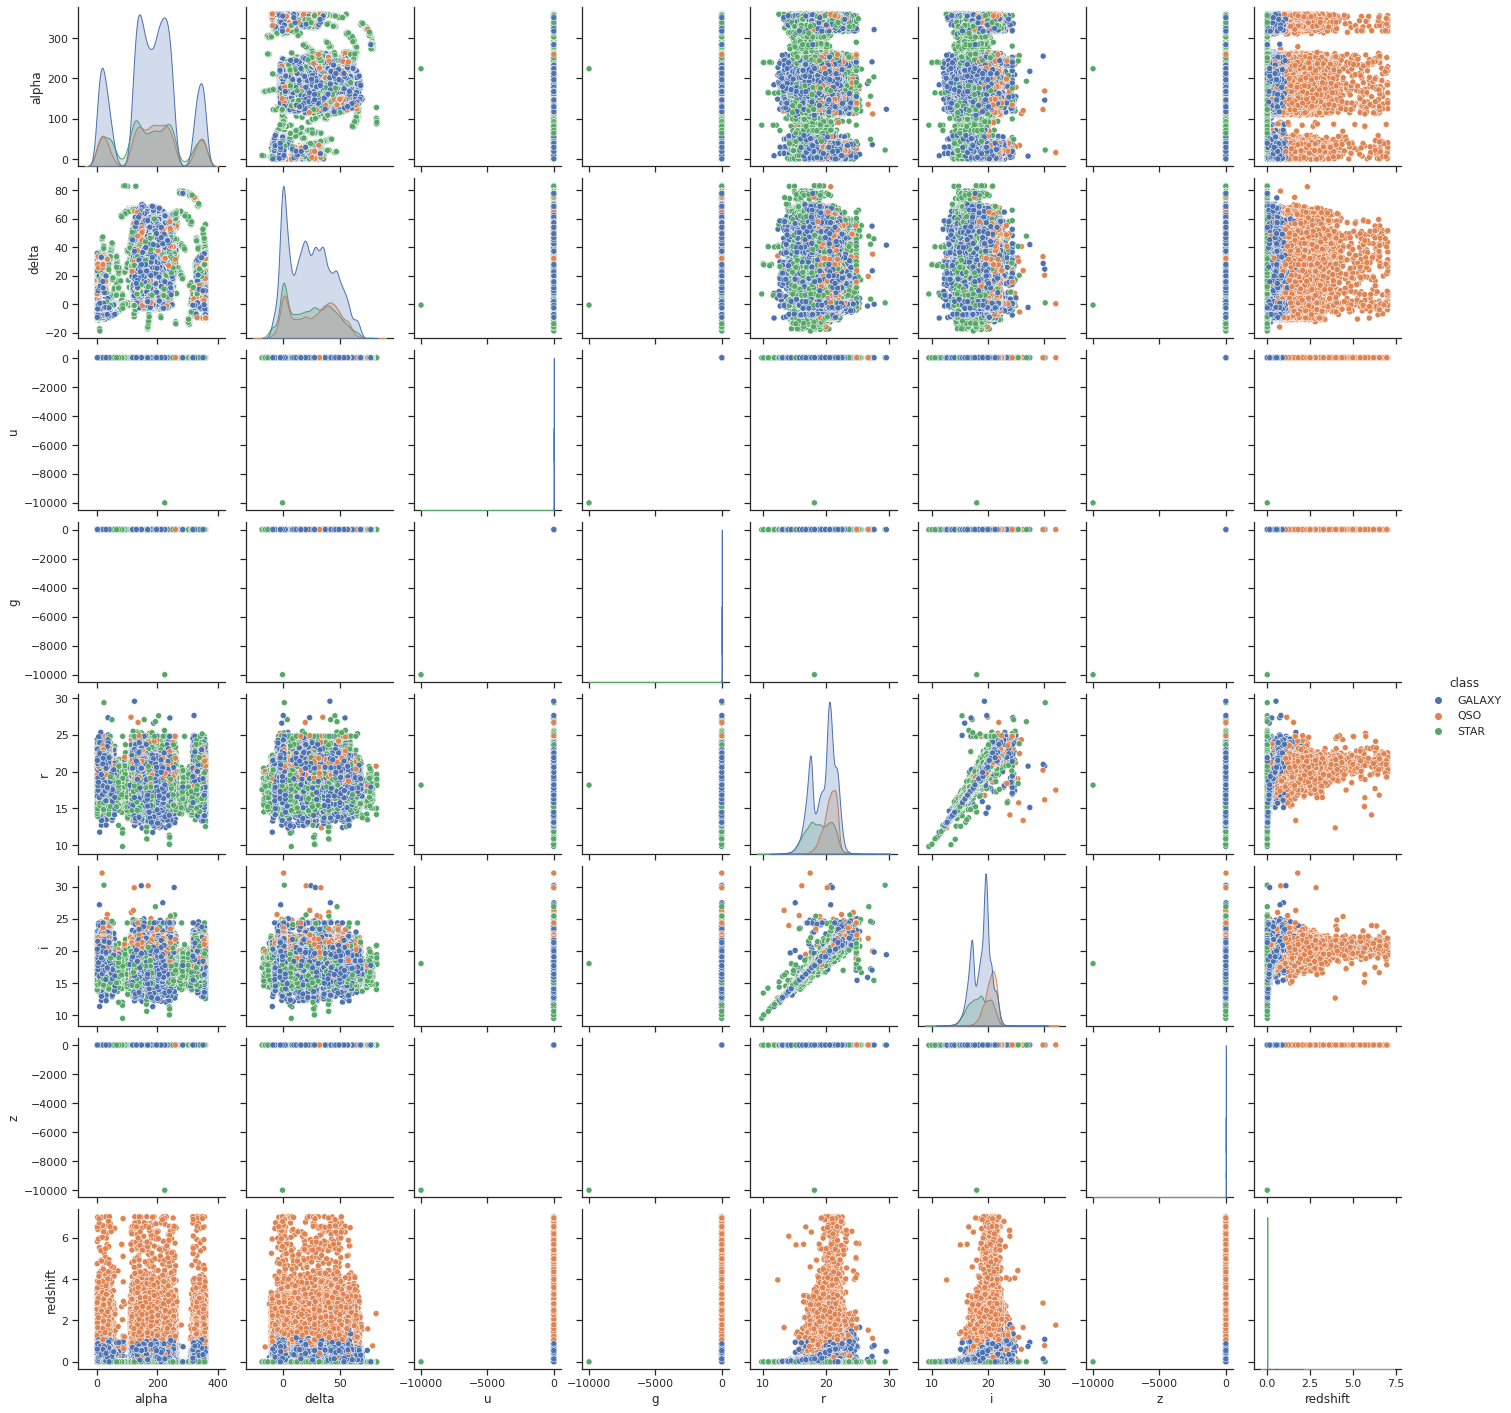

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue='class')

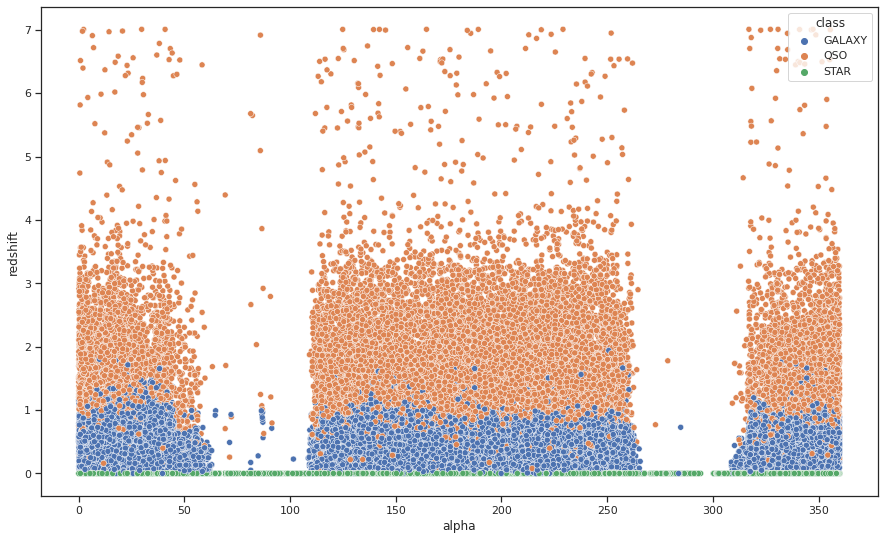

In [ ]:
sns.scatterplot(x='alpha', y='redshift', hue='class', data=df)

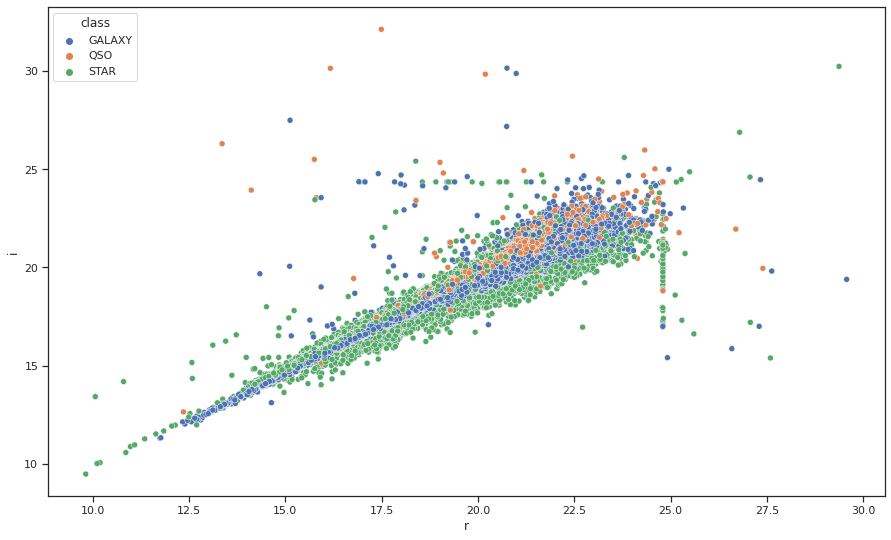

In [ ]:
sns.scatterplot(x='r', y='i', hue='class', data=df)

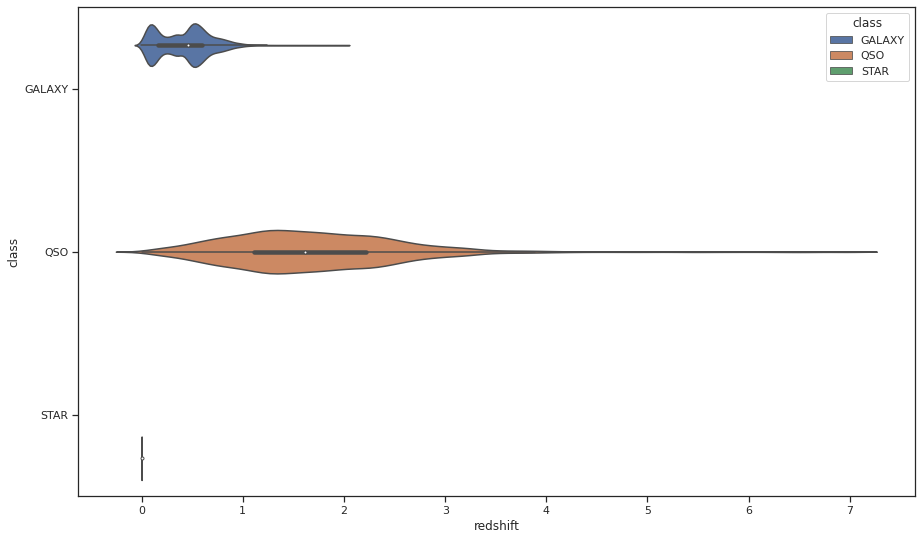

In [ ]:
ax = sns.violinplot(x=df["redshift"], y=df["class"], hue="class", data=df)

#### Data preprocessing

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_rescaled = scaler.transform(X)

#### Split into random train, validation, and test subsets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((80000, 8), (80000,), (20000, 8), (20000,))

#### Define the models with different algorithms

In [ ]:
models = {
    "Linear SVC" : LinearSVC(dual=False,max_iter=100000),
    "RBF SVC" : SVC(C=10, kernel='rbf',random_state = 0),
    "Logistic Regression" : LogisticRegression(solver='lbfgs', max_iter=100000,random_state=0),
    "K-Nearest Neighbour" :  KNeighborsClassifier(n_neighbors=3),
    "Random Forest" : RandomForestClassifier(random_state=0)
}

#### Train the models

In [ ]:
for model in models.values():
    print(model)
    model.fit(X_train,Y_train)

LinearSVC(dual=False, max_iter=100000)
SVC(C=10, random_state=0)
LogisticRegression(max_iter=100000, random_state=0)
KNeighborsClassifier(n_neighbors=3)
RandomForestClassifier(random_state=0)


#### Cross validation check

In [ ]:
for model_name, model in models.items():
    score = cross_val_score(model, X, Y, scoring='accuracy', cv=2)
    print('Acuracy of ', model_name, " is ", score.mean())

Acuracy of  Linear SVC  is  0.93173
Acuracy of  RBF SVC  is  0.8380799999999999
Acuracy of  Logistic Regression  is  0.95352
Acuracy of  K-Nearest Neighbour  is  0.7567699999999999
Acuracy of  Random Forest  is  0.9774499999999999


#### Confusion matrix to measure how well the models perform

<Figure size 216x216 with 0 Axes>

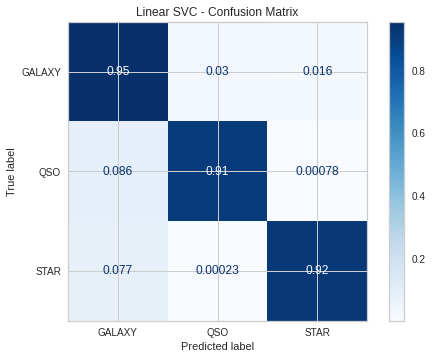

<Figure size 216x216 with 0 Axes>

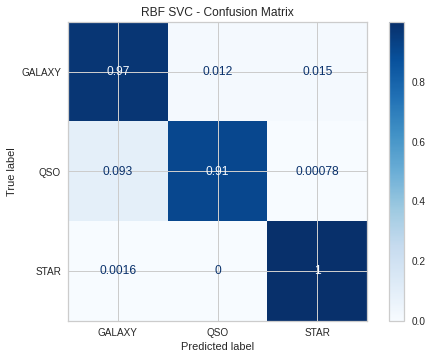

<Figure size 216x216 with 0 Axes>

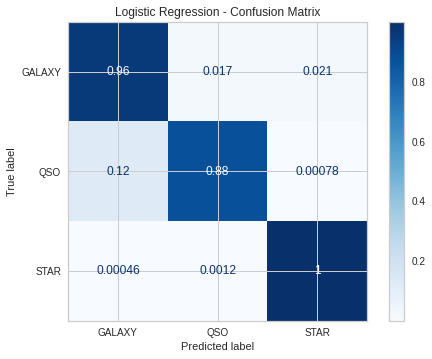

<Figure size 216x216 with 0 Axes>

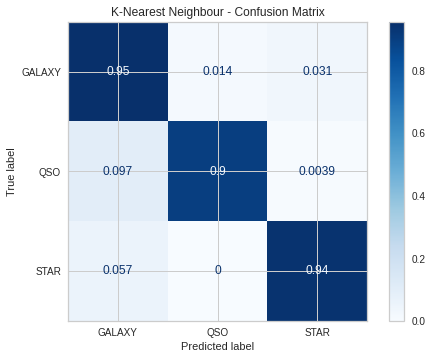

<Figure size 216x216 with 0 Axes>

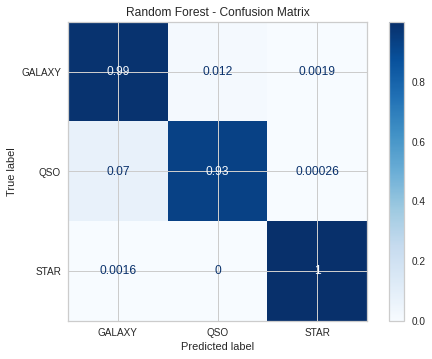

In [ ]:
for model_name, model in models.items():
    print("")
    title = str(model_name)+" - Confusion Matrix"
    predictions = model.predict(X_test)
    plt.figure(figsize=(3,3))
    cm = confusion_matrix(Y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay.from_estimator(model,
          X_test,
          Y_test,
          display_labels=model.classes_,
          cmap=plt.cm.Blues,
          normalize='true')
    disp.ax_.set_title(title)
    plt.show()
